In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import data,segmentation,measure,morphology,color

连通区域个数： 2
第 0 个：
[  66   60   52   85 1896]
第 1 个：
[  83  158   48   56 1880]


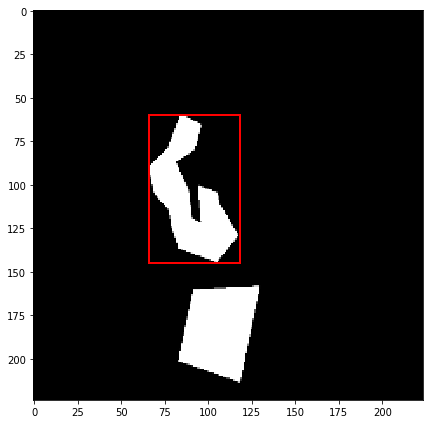

In [39]:
imgDir = 'D:/20190801/mask_test'
imgs = os.listdir(imgDir)
 
srcImg = cv2.imread(imgDir+"/"+imgs[2]) # 三维
srcImg = cv2.resize(srcImg,(224,224))

GrayImage=cv2.cvtColor(srcImg,cv2.COLOR_BGR2GRAY) # 二维

_, labels, stats, centroids = cv2.connectedComponentsWithStats(GrayImage)
print('连通区域个数：',stats.shape[0]-1)
for i in range(stats.shape[0]-1):
    # print(type(i))
    print('第 %d 个：'%i)
    print(stats[i+1])  #

fig,ax0 = plt.subplots(1,1, figsize=(8, 6))
ax0.imshow(GrayImage,plt.cm.gray)

rect = mpatches.Rectangle((stats[1][0], stats[1][1]), stats[1][2], stats[1][3],fill=False, edgecolor='red', linewidth=2)
ax0.add_patch(rect)
fig.tight_layout()
plt.show()


255


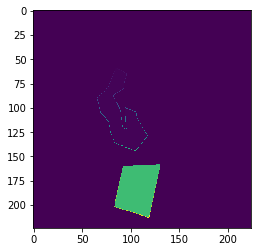

[80, 90, 90, 100, 100, 110, 110, 120, 120, 120, 130, 130, 159, 159, 159, 169, 169, 169, 179, 179, 179, 179, 189, 189, 189, 189, 199, 199] [76, 66, 76, 76, 96, 86, 96, 86, 96, 106, 86, 96, 94, 104, 114, 94, 104, 114, 84, 94, 104, 114, 84, 94, 104, 114, 94, 104] [20, 10, 20, 20, 20, 20, 20, 10, 20, 20, 10, 10, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 10, 10, 20, 20, 10, 10] [10, 20, 10, 10, 10, 20, 10, 20, 10, 10, 20, 20, 20, 20, 10, 20, 20, 10, 20, 20, 10, 10, 20, 20, 10, 10, 20, 20]


In [51]:
m,n = GrayImage.shape
# retval,image_bin=cv2.threshold(GrayImage,254,255,cv2.THRESH_BINARY_INV)

print(GrayImage[177,110])
label_image =measure.label(GrayImage)
plt.figure()
plt.imshow(label_image)
plt.show()

x = []
y = []
w = []
h = []
for region in measure.regionprops(label_image): #循环得到每一个连通区域属性集

    if  region.area < 20:
        continue
    else:

        cell = 20 # 每次扩大5，计算iou
        ratio = 0.5
        I1 = 0
        I2 = 0
        minr, minc, maxr, maxc = region.bbox
        #i = minr
        #j = minc # 初始化
        
        #while i < maxr:
            #while j < maxc:
        for i in range(minr,maxr,10):
            for j in range(minc,maxc,10):
                # for cell in range(20,100,5):
                #    if i+cell < maxr:
                I1_1 = GrayImage[i:i+cell,j:j+cell] # 第一个区域,设定为方形
                I1_2 = GrayImage[i:i+cell,j:round(j+cell*ratio)] # 第二个区域，2：1
                I1_3 = GrayImage[i:round(i+cell*ratio),j:j+cell] # 第三个区域，1：2

                I = [I1_1,I1_2,I1_3]
                I2 = cell*cell*255 # 
                
                iou1 = I1_1.sum()/I2
                iou2 = I1_2.sum()/(I2*0.5)
                iou3 = I1_3.sum()/(I2*0.5)

                iou = [iou1,iou2,iou3]
                
                loc = iou.index(max(iou))

                if max(iou) > 0.8 : # 交并比
                    x.append(i)
                    y.append(j)
                    w.append(I[loc].shape[0])
                    h.append(I[loc].shape[1])

print(x,y,w,h) 

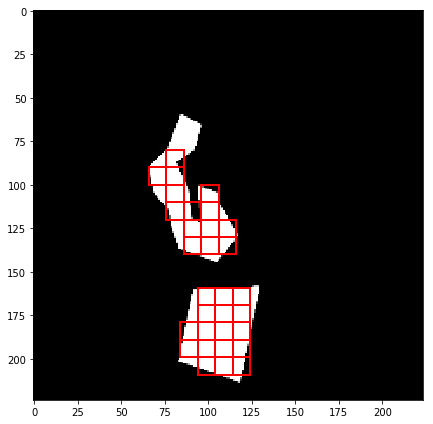

In [52]:
fig,ax0= plt.subplots(1,1, figsize=(8, 6))
ax0.imshow(GrayImage,plt.cm.gray)

for i in range(len(x)): # len(x)
    rect = mpatches.Rectangle((y[i], x[i]),h[i], w[i],fill=False, edgecolor='red', linewidth=2)
    ax0.add_patch(rect)
fig.tight_layout()
plt.show()